In [57]:
import pydicom
import os
import matplotlib.pyplot as plt
import numpy as np

In [158]:
dir_path = ('/home/ktdiedrich/Documents/localData/RadiologyImages/LIDC-IDRI/LIDC-IDRI')
dir_path_1 = os.path.join(dir_path, 'LIDC-IDRI-0001/01-01-2000-30178/')
print(dir_path)
print(dir_path_1)

/home/ktdiedrich/Documents/localData/RadiologyImages/LIDC-IDRI/LIDC-IDRI
/home/ktdiedrich/Documents/localData/RadiologyImages/LIDC-IDRI/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-30178/


In [189]:
dcms = []
class DICOMVolume:
    def __init__(self, header, volume):
        self._header = header
        self._volume = volume
    @property
    def header(self):
        return self._header
    @property
    def volume(self):
        return self._volume
    def __str__(self):
        return "Shape: {}\nHeader:\n{}".format(self._volume.shape, self._header)
    
for root, dirs, files in os.walk(dir_path_1, topdown=False):
    for dir_name in dirs:
        dcm_dir_path = os.path.join(root, dir_name)
        print(dcm_dir_path)
        dcm_file_names = [ fi for fi in os.listdir(dcm_dir_path) if fi.endswith(".dcm") ]
        dcm_file_names.sort()
        print(dcm_file_names)
        series = []
        header = ""
        if len(dcm_file_names) > 1:
            header = "{}".format(pydicom.dcmread(os.path.join(dcm_dir_path, dcm_file_names[0])))
            for fname in dcm_file_names:
                fpath = os.path.join(dcm_dir_path, fname)
                dcm_slice = pydicom.dcmread(fpath)
                series.append(dcm_slice.pixel_array)
        stack = np.dstack(tuple(series)) 
        vol = DICOMVolume(header, stack)
        print("{}".format(vol))
        dcms.append(vol)
        


/home/ktdiedrich/Documents/localData/RadiologyImages/LIDC-IDRI/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192
['000001.dcm', '000002.dcm', '000003.dcm', '000004.dcm', '000005.dcm', '000006.dcm', '000007.dcm', '000008.dcm', '000009.dcm', '000010.dcm', '000011.dcm', '000012.dcm', '000013.dcm', '000014.dcm', '000015.dcm', '000016.dcm', '000017.dcm', '000018.dcm', '000019.dcm', '000020.dcm', '000021.dcm', '000022.dcm', '000023.dcm', '000024.dcm', '000025.dcm', '000026.dcm', '000027.dcm', '000028.dcm', '000029.dcm', '000030.dcm', '000031.dcm', '000032.dcm', '000033.dcm', '000034.dcm', '000035.dcm', '000036.dcm', '000037.dcm', '000038.dcm', '000039.dcm', '000040.dcm', '000041.dcm', '000042.dcm', '000043.dcm', '000044.dcm', '000045.dcm', '000046.dcm', '000047.dcm', '000048.dcm', '000049.dcm', '000050.dcm', '000051.dcm', '000052.dcm', '000053.dcm', '000054.dcm', '000055.dcm', '000056.dcm', '000057.dcm', '000058.dcm', '000059.dcm', '000060.dcm', '000061.dcm', '000062.dcm', '000063.dcm'

(512, 512, 133)


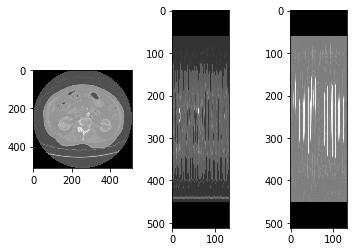

In [192]:
dcm_a = dcms[0]
print(dcm_a.volume.shape)
vol_shape  = dcm_a.volume.shape
plt.subplot(1,3,1)
plt.imshow(dcm_a.volume[:,:,90], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(dcm_a.volume[:,90,:], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(dcm_a.volume[90,:,:], cmap='gray')
# TODO slices in volumne not ordered by Series

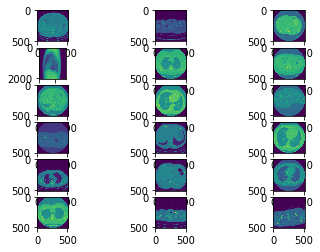

In [92]:
for idx in range(0, 18):
    plt.subplot(6, 3, idx+1)
    plt.imshow(dcms[idx].pixel_array)
plt.show()

In [91]:
dcm_path_1 = os.path.join(dir_path_1, dcm_file_names_1[ int(len(dcm_file_names_1)/2) ])
dcm_obj_1 = pydicom.dcmread(dcm_path)
print("{}".format(dcm_obj))

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.164211641461912366123110305312
(0008, 0020) Study Date                          DA: '20000101'
(0008, 0021) Series Date                         DA: '20000101'
(0008, 0022) Acquisition Date                    DA: '20000101'
(0008, 0023) Content Date                        DA: '20000101'
(0008, 0024) Overlay Date                        DA: '20000101'
(0008, 0025) Curve Date                          DA: '20000101'
(0008, 002a) Acquisition DateTime                DT: '20000101'
(0008, 0030) Study Time                          TM: '191726'
(0008, 0032) Acquisition Time                    TM: '192156'
(0008, 0033) Content Time                        TM: '192949'
(0008, 0050) Accession Num

In [108]:
tuple([1,1,2,3,2])

(1, 1, 2, 3, 2)